<a href="https://colab.research.google.com/github/Mbigdeli2003/Deep-Learning/blob/main/DNN_HW1_4Morteza_Bigdeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1_4 Linear Regression

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

##Loading Data

In [3]:
from scipy.sparse import load_npz
data = np.load('/content/drive/MyDrive/Deep Data/linear_regression_dataset.npz')
train_X = data['x']
train_Y = data['y']

## indicating the B size of X and Y and plotting

The size of X array= (100,)
The size of Y aray= (100,)


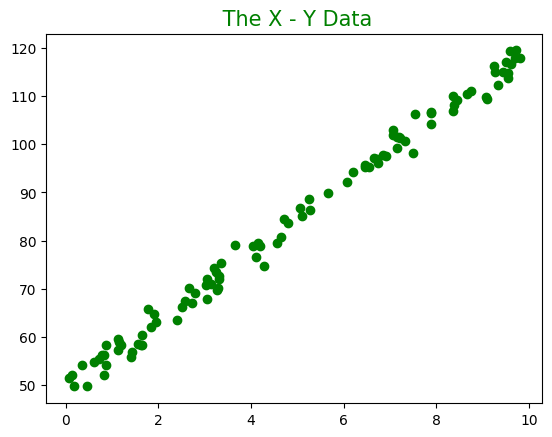

In [9]:
print('The size of X array=',train_X.shape)
print('The size of Y aray=',train_Y.shape)
font1 = {'color':'g','size':15}
plt.figure()
plt.title(' The X - Y Data',fontdict = font1)
plt.plot(train_X,train_Y, linestyle='', marker='o', color='green')

slope w1= 7.03528164368494
offset w0= 49.458623084782054


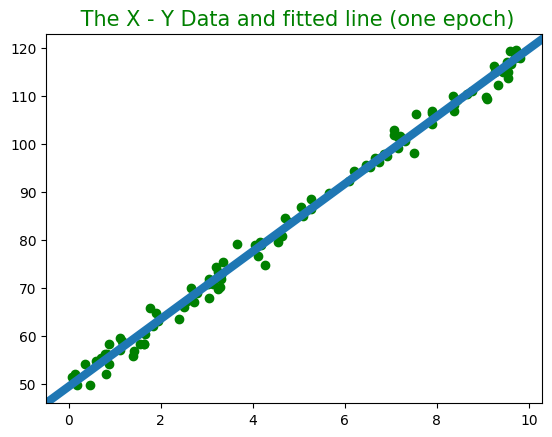

In [8]:
y=train_Y
x=train_X
reg = LinearRegression().fit(train_X[:, None], y)
plt.title(' The X - Y Data and fitted line (one epoch)',fontdict = font1)
plt.plot(train_X,train_Y, linestyle='', marker='o', color='green')
b = reg.intercept_
m = reg.coef_[0]
plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$',linewidth=6)
print('slope w1=',m)
print('offset w0=',b)

In [10]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              963.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                    7.89e-53
Time:                        15:54:15   Log-Likelihood:                         -469.12
No. Observations:                 100   AIC:                                      940.2
Df Residuals:                      99   BIC:                                      942.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Splitting test and train data for linear regression

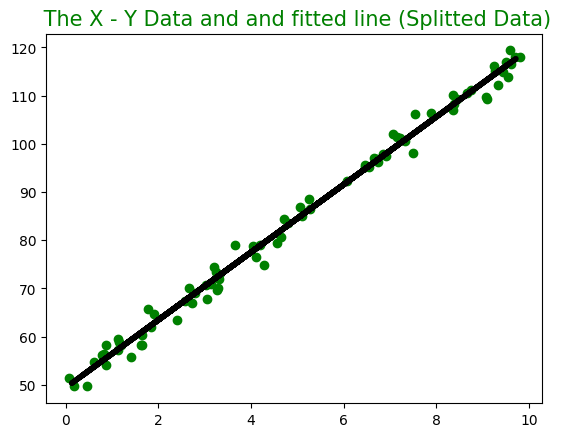

slope w1= 7.012410764012327
offset w0= 49.474212653708356


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression().fit(X_train[:, None], y_train)
y_pred = regressor.predict(X_test[:, None])
plt.title(' The X - Y Data and and fitted line (Splitted Data)',fontdict = font1)
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_pred,color='k',linewidth=4)
plt.show()
b = regressor.intercept_
m = regressor.coef_[0]
print('slope w1=',m)
print('offset w0=',b)

In [12]:
total_error = np.sum((y_train - np.transpose((m * X_train + b))) ** 2)
Loss= total_error / (len(y_train))
print('Loss for one Epoch=',Loss)

Loss for one Epoch= 3.639642205210527


## Linear Regression Trainig with Gradient Decsnet

In [19]:
X = X_train
Y=y_train
# Define your dataset
X = torch.tensor((X), dtype=torch.float32)
y = torch.tensor((Y), dtype=torch.float32)
X_t = torch.tensor((X_test), dtype=torch.float32)
y_test=torch.tensor((y_test), dtype=torch.float32)
# Initialize weights and bias
W = torch.randn(1, 1, requires_grad=True)
b=torch.randn(1, 1, requires_grad=True)

# Define hyperparameters
learning_rate = 0.01
num_epochs = 1500
hist_epoch=[]
hist_loss=[]
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = X*W + b

    # Calculate loss
    loss = torch.mean((outputs - y) ** 2)

    # Backward pass
    loss.backward()

    # Update weights and bias
    with torch.no_grad():
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad

        # # Manually zero the gradients
        W.grad.zero_()
        b.grad.zero_()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        hist_loss.append(loss.item())
        hist_epoch.append(epoch+1)

print(f'W:{W}, b:{b}')
# After training
hist_epoch_t=[]
hist_loss_t=[]
for epoch in range(num_epochs):
    new_input =torch.tensor((X_test), dtype=torch.float32)
    predicted_output = new_input*W+b

    loss_t = torch.mean((predicted_output - y_test) ** 2)
    loss_t.backward()
    hist_loss_t.append(loss.item())
    hist_epoch_t.append(epoch+1)

<ipython-input-19-437086b3830a>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test=torch.tensor((y_test), dtype=torch.float32)


Epoch [100/1500], Loss: 206.7655
Epoch [200/1500], Loss: 74.1709
Epoch [300/1500], Loss: 28.1301
Epoch [400/1500], Loss: 12.1435
Epoch [500/1500], Loss: 6.5924
Epoch [600/1500], Loss: 4.6649
Epoch [700/1500], Loss: 3.9957
Epoch [800/1500], Loss: 3.7633
Epoch [900/1500], Loss: 3.6826
Epoch [1000/1500], Loss: 3.6545
Epoch [1100/1500], Loss: 3.6448
Epoch [1200/1500], Loss: 3.6414
Epoch [1300/1500], Loss: 3.6403
Epoch [1400/1500], Loss: 3.6399
Epoch [1500/1500], Loss: 3.6397
W:tensor([[7.0149]], requires_grad=True), b:tensor([[49.4576]], requires_grad=True)


### plotting trained and test Data

<Figure size 640x480 with 0 Axes>

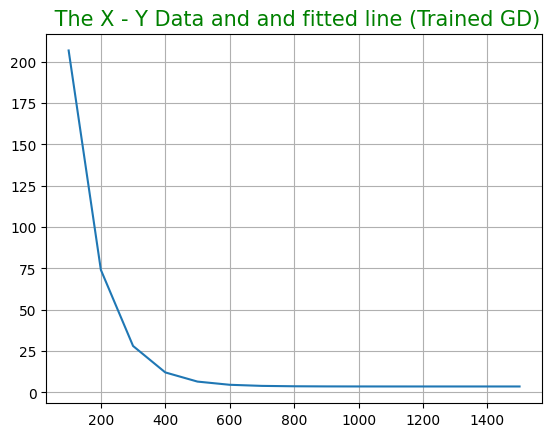

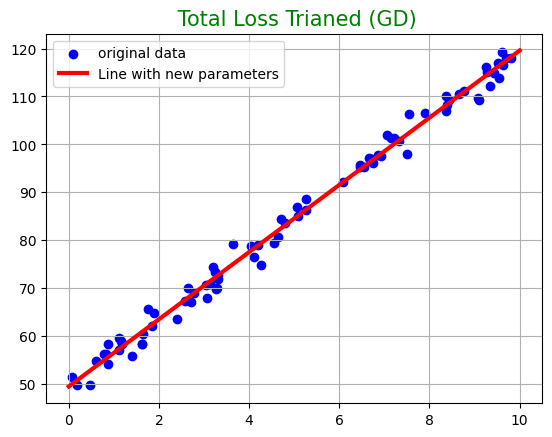

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(1)
plt.plot(hist_epoch, hist_loss)
plt.title(' The X - Y Data and and fitted line (Trained GD)',fontdict = font1)
plt.grid()
plt.figure(2)
plt.title(' Total Loss Trianed (GD)',fontdict = font1)
plt.scatter(X,y, color='blue', label='original data')
x_values = torch.linspace(0, 10, 80)  # Assuming range of X is from 0 to 1
y_values = W.item() * x_values + b.item()  # Calculate corresponding y values for the line
plt.plot(x_values.numpy(), y_values.numpy(), color='red', label='Line with new parameters', linewidth=3)
plt.grid()
plt.legend()
plt.figure(3)

##  Closed-form solution to the linear regression problem

Loss: 3.639643430709839


Text(0.5, 1.0, 'Residuals Plot (closed form)')

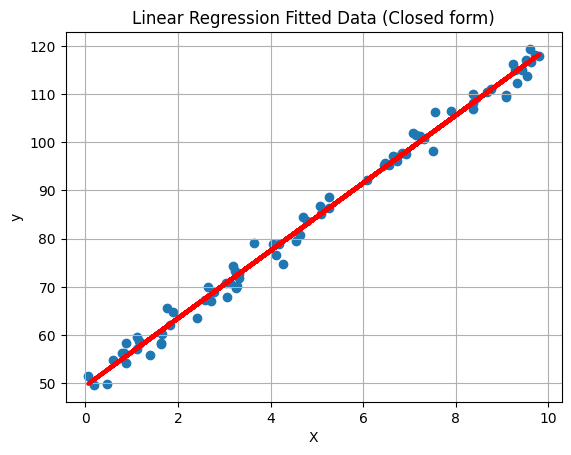

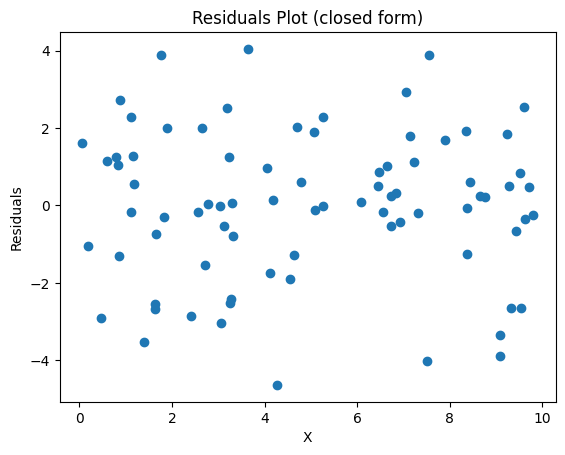

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = X_train.reshape(-1,1)
Y=y_train
# Define your dataset
X = torch.tensor((X), dtype=torch.float32)
y = torch.tensor((Y), dtype=torch.float32)
# Calculate closed-form solution
X_b = torch.cat((torch.ones_like(X), X), 1)
theta_closed_form = torch.matmul(torch.matmul(torch.inverse(torch.matmul(X_b.t(), X_b)), X_b.t()), y)

# Plot the fitted data with the solution
plt.figure(1)
plt.scatter(X.numpy(), y.numpy(),label='original data')
plt.plot(X.numpy(), (theta_closed_form[0] + theta_closed_form[1]*X).numpy(), color='red',label='Line with new parameters',linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fitted Data (Closed form)')
plt.grid()
# Calculate and plot the loss function
loss = nn.MSELoss()(torch.matmul(X_b, theta_closed_form), y)
print(f'Loss: {loss.item()}')
plt.figure(2)
plt.plot(X.numpy(), (y - torch.matmul(X_b, theta_closed_form)).numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot (closed form)')

